In [2]:
%pip install h5py

   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB 330.3 kB/s eta 0:00:10
    --------------------------------------- 0.1/3.0 MB 563.7 kB/s eta 0:00:06
   - -------------------------------------- 0.1/3.0 MB 726.2 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/3.0 MB 888.4 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/3.0 MB 901.1 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/3.0 MB 930.9 kB/s eta 0:00:03
   ---- ----------------------------------- 0.4/3.0 MB 1.1 MB/s eta 0:00:03
   ------ --------------------------------- 0.5/3.0 MB 1.1 MB/s eta 0:00:03
   ------- -------------------------------- 0.6/3.0 MB 1.2 MB/s eta 0:00:03
   -------- ------------------------------- 0.6/3.0 MB 1.3 MB/s eta 0:00:02
   --------- ------------------------------ 0.7/3.0 MB 1.3 MB/s eta 0:00:02
   --------- -

In [3]:
import h5py
# import torch
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with h5py.File('../damaged_images_tensor_data_100.h5', 'r') as h5f:
    image_data = h5f['image'][:]
    # image_tensor = torch.tensor(image_data, dtype=torch.uint8)

print(f'Shape: {image_data.shape}')

image_data[0]

Shape: (100, 3, 256, 256)


array([[[125, 123, 124, ..., 133, 134, 136],
        [134, 130, 127, ..., 136, 138, 140],
        [141, 135, 131, ..., 136, 137, 138],
        ...,
        [ 69,  59,  52, ..., 121, 124, 123],
        [ 80,  62,  69, ..., 118, 124, 125],
        [113,  98,  76, ..., 124, 130, 131]],

       [[182, 181, 182, ..., 192, 193, 195],
        [191, 188, 185, ..., 195, 197, 199],
        [198, 193, 189, ..., 195, 196, 197],
        ...,
        [ 69,  61,  54, ..., 102, 102, 101],
        [ 78,  60,  70, ..., 103, 106, 105],
        [110,  96,  77, ..., 110, 114, 115]],

       [[147, 143, 144, ..., 124, 125, 127],
        [156, 150, 147, ..., 129, 129, 131],
        [163, 155, 151, ..., 129, 130, 131],
        ...,
        [ 57,  48,  43, ...,  60,  65,  64],
        [ 63,  47,  56, ...,  62,  68,  70],
        [ 93,  81,  63, ...,  71,  78,  79]]], dtype=uint8)

In [5]:
with h5py.File('../images_tensor_data_100.h5', 'r') as h5f:
    damaged_image_data = h5f['image'][:]
    # image_tensor = torch.tensor(image_data, dtype=torch.uint8)

print(f'Shape: {damaged_image_data.shape}')

Shape: (100, 3, 256, 256)


In [81]:
def image_index(idx: int) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    image = image_data[idx]
    image_damaged = damaged_image_data[idx]
    diff = image_damaged - image
    return image, image_damaged, diff

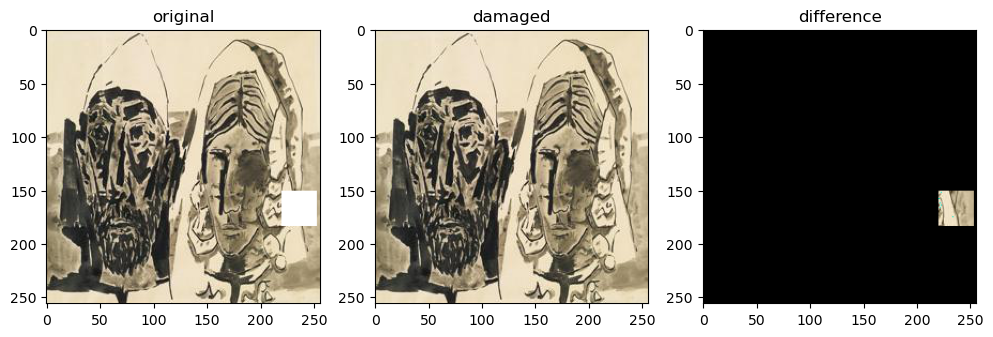

In [82]:
image, image_damaged, diff = image_index(90)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(image.transpose(1, 2, 0))
ax[0].set_title('original')
ax[1].imshow(image_damaged.transpose(1, 2, 0))
ax[1].set_title('damaged')
ax[2].imshow(diff.transpose(1, 2, 0))
ax[2].set_title('difference')
plt.show()